In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [3]:
def f_cost(u, m):
    #scaling m and u
    M = m/0.035
    U = u/10
    
    f_met = 1.073*M**(-1/4)*U**(-1)
    f_par = 0.023*M**(-1/3)*U**(2)
    f_ind = 0.025*M**(1/3)*U**(-2)
    
    return f_met+f_par+f_ind

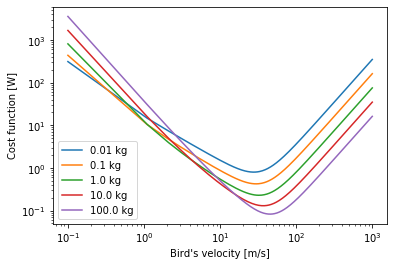

In [4]:
# PART 1.2

u_array = np.linspace(0.1,1000,1000)
m_array = np.logspace(-2,2,5)

for m in m_array:
    plt.loglog(u_array, f_cost(u_array,m), label = str(m) + ' kg')

plt.ylabel("Cost function [W]")
plt.xlabel("Bird's velocity [m/s]")
plt.legend()

In [5]:
def pow_law(x,a,b):
    return a*x**b

0.23414508079251473 -0.26585958315115066


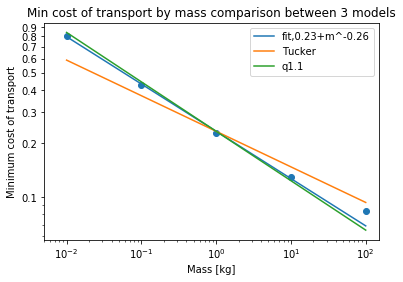

In [15]:
u_min = []
e_min = []
for m in m_array:
    result = opt.minimize(f_cost , 1, args = m)
    u_min.append(result.x[0])
    e_min.append(result.fun)
    
plt.scatter(m_array,e_min)

#fit
params, cov = opt.curve_fit(pow_law, m_array, np.array(e_min))
a,b = params

#plot fit
plt.loglog(m_array,pow_law(m_array,a,b), label = 'fit,{}+m^{}'.format(0.23,-0.26))
plt.loglog(m_array,pow_law(m_array,a,-0.2), label = 'Tucker')
plt.loglog(m_array,pow_law(m_array,a,-5/18), label = 'q1.1')
plt.xlim(5e-3,150)
plt.yticks([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           labels=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.xlabel('Mass [kg]')
plt.ylabel('Minimum cost of transport')
plt.title('Min cost of transport by mass comparison between 3 models')
plt.legend()
print(a,b)

The minimum cost of transport decreases with increasing mass, when m increases and m/0.035 > 1. The first two terms (metabolic and parasitic) will then get smaller and smaller with increasing mass.

At high m, the induced drag term dominates which has the effect of increasing e_min for that mass.